__Import necessary libraries__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import pickle

__Load the Dataset__

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


__Remove__ ('Id' Column)

In [3]:
df = df.drop(columns= ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


__Check__ (NULL & DUBLICATES)

In [4]:
print('Before:', df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('After:', df.duplicated().sum(),'\n')

print(df.isnull().sum())

Before: 3
After: 0 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


__Statistics Summary__

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


__Visualization__

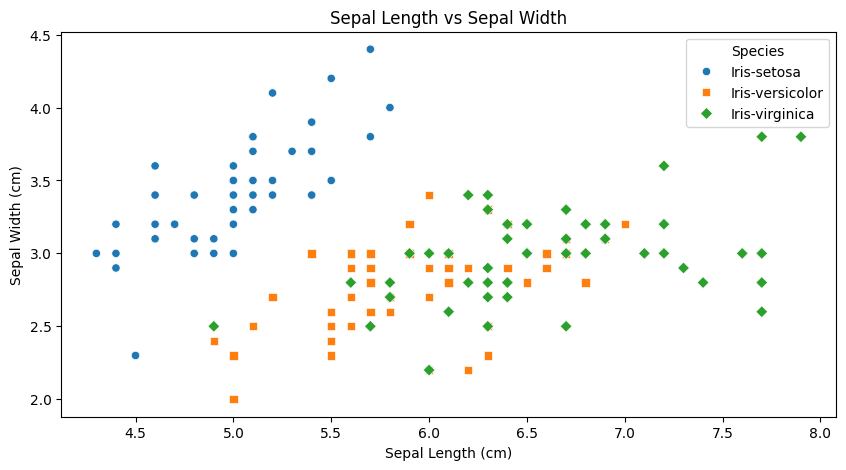

In [6]:
# Vislualizing the sepal length&Width
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', style='Species', markers=["o", "s", "D"])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

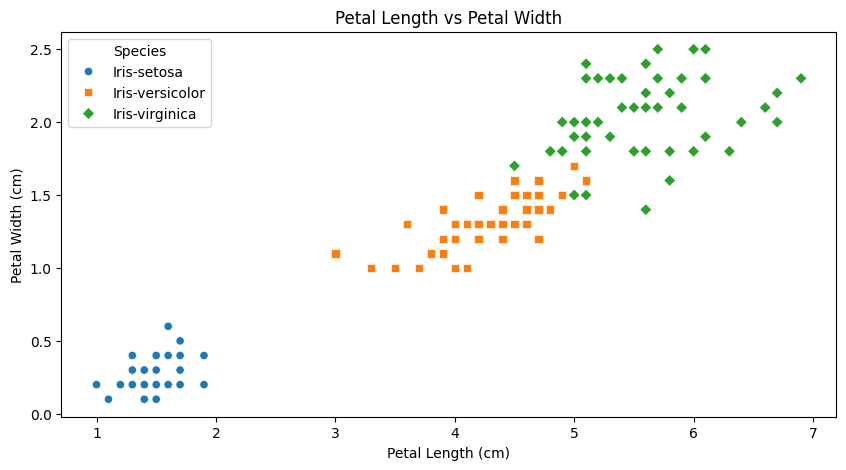

In [7]:
# Vislualizing the petal length&Width
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', style='Species', markers=["o", "s", "D"])
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

__Correlation Matrix__

In [8]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109321       0.871305      0.817058
SepalWidthCm       -0.109321      1.000000      -0.421057     -0.356376
PetalLengthCm       0.871305     -0.421057       1.000000      0.961883
PetalWidthCm        0.817058     -0.356376       0.961883      1.000000


__Heatmap__ (Visualize)

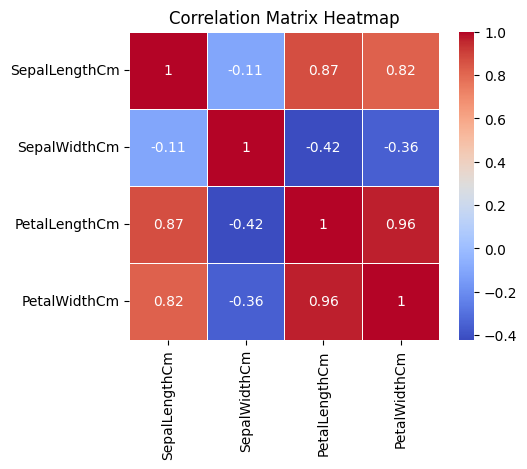

In [9]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

__Label Encoder__

In [10]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

__Save__ (label Encoder)

In [11]:
label_encoder_path = 'label_encoder.pkl'
with open(label_encoder_path, 'wb') as file:
    pickle.dump(le, file)

__Features & Labels__

In [12]:
X = df.drop(columns=['Species'])
y = df['Species']

__Data Splitting__ (Training & Testing Sets)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

__Define Models__ (seperated scaling pipeline)

In [14]:
models = {
    'Logistic Regression': Pipeline([('scalar', StandardScaler()),('model', LogisticRegression(max_iter=500, C=1.0))]),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': Pipeline([('scalar', StandardScaler()),('model', SVC(probability=True))]),
    'Naive Bayes': Pipeline([('scalar', StandardScaler()), ('model', GaussianNB())])
}

__Model Performance__ (Mean Acc & Std Dev)
###### Understanding which model is reliable.

In [15]:
cv_results = {}
print("TRAINING DATA RESULTS")

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    mean_acc = scores.mean()
    std_acc = scores.std()

    print(f"\n{name}")
    print(f"Mean Accuracy: {mean_acc*100:.2f}%  ->  Std Dev: {std_acc*100:.2f}%")
    cv_results[name] = mean_acc

TRAINING DATA RESULTS

Logistic Regression
Mean Accuracy: 95.19%  ->  Std Dev: 4.26%

Decision Tree
Mean Accuracy: 95.14%  ->  Std Dev: 3.01%

Random Forest
Mean Accuracy: 96.10%  ->  Std Dev: 3.59%

SVM
Mean Accuracy: 97.10%  ->  Std Dev: 3.83%

Naive Bayes
Mean Accuracy: 95.14%  ->  Std Dev: 3.01%


In [16]:
cv_results

{'Logistic Regression': np.float64(0.9519047619047619),
 'Decision Tree': np.float64(0.9514285714285714),
 'Random Forest': np.float64(0.9609523809523809),
 'SVM': np.float64(0.9709523809523809),
 'Naive Bayes': np.float64(0.9514285714285714)}

__Choosing Best Model__ (Based on Mean Accuracy)

In [17]:
max_accuracy = max(cv_results.values())
best_models = [name for name, acc in cv_results.items() if acc == max_accuracy]

print(f"Maximum accuracy achieved: {max_accuracy*100:.2f}%")
print(f"Same Max Accuracy Models: {best_models}")

best_model_name = 'Logistic Regression'
best_model = models[best_model_name]

# Model retrain on full training dataset
best_model.fit(X_train, y_train)

Maximum accuracy achieved: 97.10%
Same Max Accuracy Models: ['SVM']


,steps,"[('scalar', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


__Save__ (Best Model)

In [18]:
with open('iris_best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print(f"\n'{best_model_name}' saved.")


'Logistic Regression' saved.



Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45


Confusion Matrix:


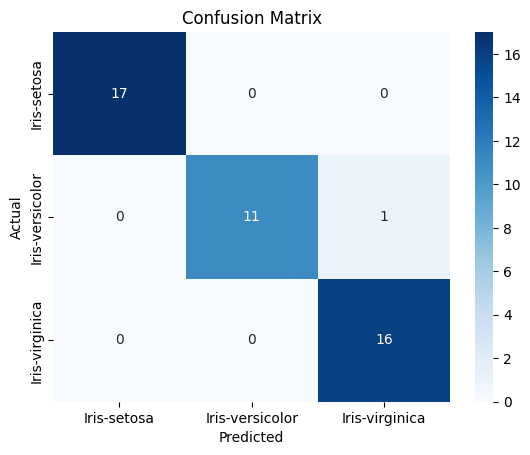

In [19]:
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()